<a href="https://colab.research.google.com/github/Mohan1github/ML_projects/blob/main/Essay_analysis_using__langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langchain langchain_core langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: langchain_core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [2]:
!pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 9.4 MB/s eta 0:00:00


In [20]:
from typing import TypedDict
from langgraph.graph import StateGraph, END
from langchain.prompts import PromptTemplate
from langchain_core.runnables.graph import MermaidDrawMethod
from langchain_core.prompts.chat import ChatPromptTemplate
from IPython.display import Image, display
import re

In [15]:
# state definition

class State(TypedDict):
  essay:str
  relevance_score:float
  grammer_score:float
  depth_score:float
  structure_score:float
  final_score:float


In [16]:
# language model initialization

from langchain_groq import ChatGroq

llm = ChatGroq(
    temperature=0,
    groq_api_key="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",
    model_name="llama-3.3-70b-versatile"
               )


result = llm.invoke("what is the application of the variational auto encoders in  gen ai?")

print(result.content)

Variational Autoencoders (VAEs) have numerous applications in Generative AI, including:

1. **Generative Modeling**: VAEs can be used to model complex distributions of data, such as images, videos, and text. They learn to represent the data in a lower-dimensional latent space, which can be used to generate new samples that are similar to the original data.
2. **Image Generation**: VAEs can be used to generate new images that are similar to a given dataset. For example, they can be used to generate new faces, objects, or scenes.
3. **Data Imputation**: VAEs can be used to impute missing data by learning a probabilistic representation of the data. This can be useful in applications such as image inpainting, where missing pixels need to be filled in.
4. **Anomaly Detection**: VAEs can be used to detect anomalies in data by learning a probabilistic representation of the normal data distribution. Any data points that are far away from the normal distribution can be identified as anomalies.


In [60]:
# defining the functions for the graph nodes

def check_score(content : str) -> float:
  match_ = re.search(r'Score:\s*(\d+(\.\d+)?)', content)
  if match_:
    return float(match_.group(1))
  else:
    return ValueError(f'colud not extract score from {content}')


def check_relevance(state:State) -> State:
  prompt = ChatPromptTemplate(
      """Analyse the relevance of the given context to the given topic.
Provide a relevance score between 0 and 1.
Your response should starts with the 'Score:' followed by the score,
then provide your explanation.

Essay:{{essay}}"""
  )
  result = llm.invoke(prompt.format(essay= state['essay']))

  try:
    state["relevance_score"] = check_score(result.content)
  except ValueError as e:
    print(f'Error in check relevance :{e}')
    state['relevance_score'] = 0.0
  return state

def check_grammar(state:State) -> State:
  prompt = ChatPromptTemplate(
      """Analyse the relevance of the given context to the given topic.
Provide a relevance score between 0 and 1.
Your response should starts with the 'Score:' followed by the score,
then provide your explanation.

Essay:{{essay}}"""
  )
  result = llm.invoke(prompt.format(essay= state['essay']))

  try:
    state["grammar_score"] = check_score(result.content)
  except ValueError as e:
    print(f'Error in check grammar :{e}')
    state['grammar_score'] = 0.0
  return state

def analyse_structure(state:State) -> State:
  prompt = ChatPromptTemplate(
       """Analyse the relevance of the given context to the given topic.
Provide a relevance score between 0 and 1.
Your response should starts with the 'Score:' followed by the score,
then provide your explanation.

Essay:{{essay}}"""
  )
  result = llm.invoke(prompt.format(essay= state['essay']))

  try:
    state["structure_score"] = check_score(result.content)
  except ValueError as e:
    print(f'Error in check relevance :{e}')
    state['structure_score'] = 0.0
  return state

def depth_analysis(state:State) -> State:
  prompt = ChatPromptTemplate(
      """Analyse the relevance of the given context to the given topic.
Provide a relevance score between 0 and 1.
Your response should starts with the 'Score:' followed by the score,
then provide your explanation.

Essay:{{essay}}"""
  )
  result = llm.invoke(prompt.format(essay= state['essay']))

  try:
    state["depth_analysis"] = check_score(result.content)
  except ValueError as e:
    print(f'Error in check relevance :{e}')
    state['depth_analysis'] = 0.0
  return state

def calculate_final_score(state:State) -> State:
  state['final_score'] = state['relevance_score'] * 0.3
  + state['grammar_score']*0.2
  + state['depth_analysis']* 0.3 + state['structure_score']*0.2
  return state




In [61]:
# defining the garph work flow

workflow = StateGraph(State)

workflow.add_node("check_relevance",check_relevance)
workflow.add_node("check_grammar",check_grammar)
workflow.add_node("analyse_structure",analyse_structure)
workflow.add_node("depth_analysis", depth_analysis)
workflow.add_node("calculate_final_score",calculate_final_score)


workflow.add_conditional_edges("check_relevance",
                            lambda x: "check_grammar" if x["check_grammar"] > 0.5 else "calculate_final_score" )


workflow.add_conditional_edges("check_grammar",
                            lambda x: "analyse_structure" if x["analyse_structure"] > 0.5 else "calculate_final_score" )

workflow.add_conditional_edges("analyse_structure",
                            lambda x: "depth_analysis" if x["depth_analysis"] > 0.5 else "calculate_final_score" )


workflow.add_conditional_edges("depth_analysis",
                            lambda x: "calculate_final_score" )

workflow.set_entry_point("check_relevance")

workflow.add_edge("calculate_final_score",END)

app = workflow.compile()


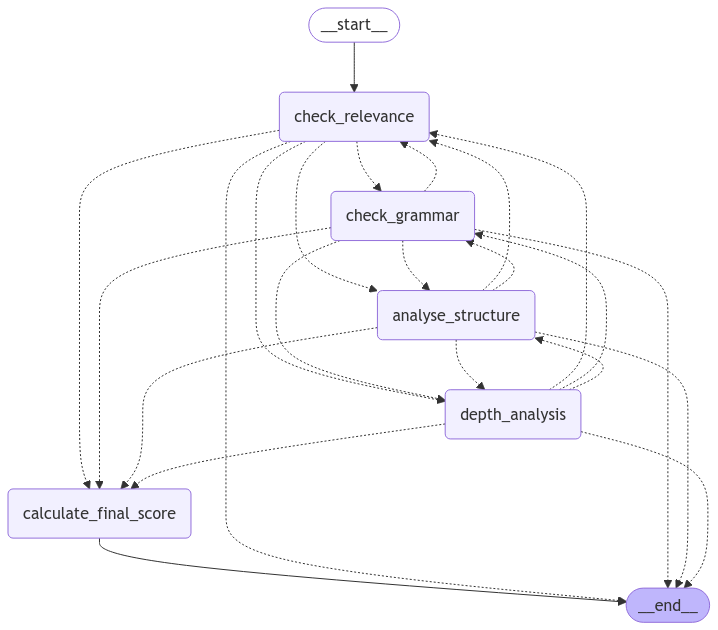

In [62]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method = MermaidDrawMethod.API
        )
    )
)

In [63]:
def grade_essay(essay:str) -> dict:
  initial_state = State(
      essay = essay,
      relevance_score = 0.0,
      grammer_score = 0.0,
      depth_score = 0.0,
      structure_score = 0.0,
      final_score = 0.0
  )

  result = app.invoke(initial_state)
  return result

In [ ]:
sample_essay = """        In today's globalized world, the ability to communicate in multiple languages has become a valuable asset. Learning a foreign language is not only a valuable skill, but it also opens doors to new cultures, perspectives, and opportunities. Being able to speak more than one language can broaden one's career prospects, enhanced travel experiences, and improve relationships with people from diverse backgrounds. Language is a powerful tool that can break down cultural barriers and foster greater understanding and cooperation between nations.

Furthermore, learning a foreign language can improve cognitive skills, such as memory, concentration, and problem-solving. It can also delay the onset of age-related cognitive decline and improve overall brain function. Additionally, bilingual individuals have been shown to have a greater sense of empathy and compassion, as they are able to see the world from multiple perspectives.

In conclusion, learning a foreign language is an essential aspect of personal and professional development. It can open doors to new experiences, improve cognitive skills, and foster greater understanding and cooperation between nations. With the rise of globalization, the importance of language learning will only continue to grow, and it is essential that individuals take advantage of this valuable skill to enhance their lives and the lives of others."""

result = grade_essay( sample_essay)

print(result.content)